In [1]:
## Sampling types

## 1. UpSampling
## 2. DownSampling

In [16]:
import numpy as np
import pandas as pd

np.random.seed(123) ## set the random seed for reproducability

## Create a dataframe with two classes
n_samples=1000
class_0_ratio=0.9
n_class_0=int(n_samples*class_0_ratio)
n_class_1=n_samples -n_class_0


In [18]:
## got two classels n_class0 and n_class1

n_class_0, n_class_1

(900, 100)

In [24]:
## Create my dataframe with imbalanced dataset

class_0=pd.DataFrame({
    'feature_1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]* n_class_0
})

class_1=pd.DataFrame({
    'feature_1':np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_2':np.random.normal(loc=2,scale=1,size=n_class_1),
    'target':[1]* n_class_1
})

In [25]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [26]:
df.head()

,feature_1,feature_2,target
0,-0.471276,0.328462,0
1,1.084072,1.038230,0
2,-0.379223,1.147064,0
3,-0.362274,0.638254,0
4,-0.681071,-1.075766,0


In [27]:
df.tail()

,feature_1,feature_2,target
995,2.720690,1.978489,1
996,1.949078,3.709793,1
997,2.709784,3.324917,1
998,1.817689,1.549237,1
999,2.838910,2.240773,1


In [28]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [29]:
## upsampling

df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [31]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42) ## sample with replacement

In [32]:
df_minority_upsampled

,feature_1,feature_2,target
951,2.701255,0.056481,1
992,2.322342,3.289170,1
914,2.500618,1.338170,1
971,1.922944,2.907951,1
960,0.630218,0.982405,1
...,...,...,...
952,1.035138,1.334364,1
965,2.722939,2.109470,1
976,0.929157,2.111367,1
942,2.367930,3.715577,1


In [35]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled])


In [36]:
df_upsampled

,feature_1,feature_2,target
0,-0.471276,0.328462,0
1,1.084072,1.038230,0
2,-0.379223,1.147064,0
3,-0.362274,0.638254,0
4,-0.681071,-1.075766,0
...,...,...,...
952,1.035138,1.334364,1
965,2.722939,2.109470,1
976,0.929157,2.111367,1
942,2.367930,3.715577,1


In [37]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [38]:
## Down Sampling

import numpy as np
import pandas as pd

np.random.seed(123) ## set the random seed for reproducability

## Create a dataframe with two classes
n_samples=1000
class_0_ratio=0.9
n_class_0=int(n_samples*class_0_ratio)
n_class_1=n_samples -n_class_0


In [39]:
## Create my dataframe with imbalanced dataset

class_0=pd.DataFrame({
    'feature_1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature_2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]* n_class_0
})

class_1=pd.DataFrame({
    'feature_1':np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature_2':np.random.normal(loc=2,scale=1,size=n_class_1),
    'target':[1]* n_class_1
})

In [40]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)


In [41]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [42]:
from sklearn.utils import resample
df_majority_downsampled=resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42) ## sample with replacement

In [45]:
df_majority_downsampled.shape

(100, 3)

In [ ]:
df_downsampled=pd.concat([df_majority,df_majority_downsampled])


,feature_1,feature_2,target
70,-1.968149,0.323468,0
827,-0.255966,-1.579172,0
231,0.025049,-0.891623,0
588,2.165832,-0.051151,0
39,-0.860429,-1.089545,0
...,...,...,...
398,-0.414723,0.354360,0
76,-0.342394,-0.158087,0
196,0.655082,0.249274,0
631,-0.612125,1.054153,0


In [49]:
df_downsampled.target.value_counts()

target
0    1000
Name: count, dtype: int64

## Upsampling Technique


## SMOTE(Synthetic Minority Oversampling Technique)

## It is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [57]:

from sklearn.datasets import make_classification


In [60]:
X,y=df=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=12)

In [66]:
import pandas as pd
import numpy as np


df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)


In [68]:
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [69]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

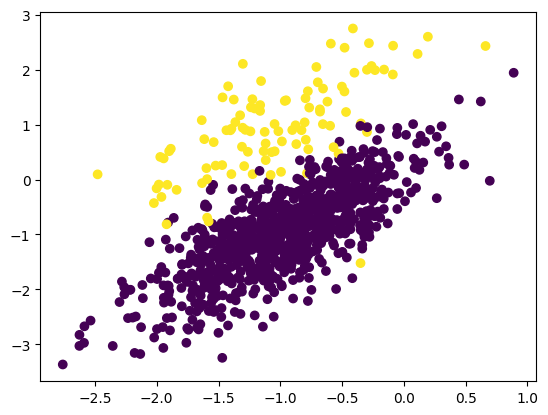

In [71]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [72]:
!pip install imblearn


   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 0/2 [imbalanced-learn]
   ---------------------------------------- 2/2 [imblearn]



In [73]:
from imblearn.over_sampling import SMOTE



In [75]:
## transform the dataset
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [76]:
X.shape

(1800, 2)

In [77]:
y.shape

(1800,)

In [79]:
## With respect to y 

y[y==0]

0      0
1      0
2      0
4      0
5      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: target, Length: 900, dtype: int64

In [81]:
len(y[y==0])

900

In [82]:
len(y[y==1])

900

In [84]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])

oversample_df=pd.concat([df1,df2],axis=1)


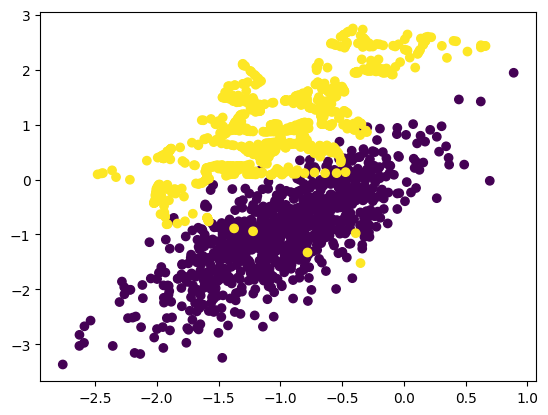

In [85]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])